#### * What kind of data would you collect?
#### A. I would collect a csv format dataset which can be converted into test and train data.
#### 
#### * What would be the input and output?
#### A. Input would be a cleaned dataset includong all important features as well as actual target.
####    Output would be a prediction like GPA in this case.
#### 
#### * Which type of ML would you use (Supervised, Unsupervised, or Reinforcement)?
#### A. I would use Supervised ML which takes labelled data. Further, I would use regression model like RandomForestRegressor to predict continuous outputs.
#### 
#### * How would you check if your model is working well?
#### A. For regression model using RandomForestRegressor, I would use Root Mean Squared Error.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [3]:
data=pd.read_csv("Student_performance_data.csv")

In [4]:
data

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2387,3388,18,1,0,3,10.680555,2,0,4,1,0,0,0,3.455509,0.0
2388,3389,17,0,0,1,7.583217,4,1,4,0,1,0,0,3.279150,4.0
2389,3390,16,1,0,2,6.805500,20,0,2,0,0,0,1,1.142333,2.0
2390,3391,16,1,1,0,12.416653,17,0,2,0,1,1,0,1.803297,1.0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StudentID          2392 non-null   int64  
 1   Age                2392 non-null   int64  
 2   Gender             2392 non-null   int64  
 3   Ethnicity          2392 non-null   int64  
 4   ParentalEducation  2392 non-null   int64  
 5   StudyTimeWeekly    2392 non-null   float64
 6   Absences           2392 non-null   int64  
 7   Tutoring           2392 non-null   int64  
 8   ParentalSupport    2392 non-null   int64  
 9   Extracurricular    2392 non-null   int64  
 10  Sports             2392 non-null   int64  
 11  Music              2392 non-null   int64  
 12  Volunteering       2392 non-null   int64  
 13  GPA                2392 non-null   float64
 14  GradeClass         2392 non-null   float64
dtypes: float64(3), int64(12)
memory usage: 280.4 KB


## The data is already scaled and encoded. There is no null value.

# TRAIN , VALIDATION AND TEST DATA

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
train,val=train_test_split(data,test_size=0.2,random_state=42)

In [8]:
val,test=train_test_split(val,test_size=0.5,random_state=42)

# INPUT AND OUTPUT DATA

In [9]:
train_input=train.drop(columns=["GPA","GradeClass","StudentID"],axis=1)
val_input=val.drop(columns=["GPA","GradeClass","StudentID"],axis=1)
test_input=test.drop(columns=["GPA","GradeClass","StudentID"],axis=1)

In [10]:
train_output=train.GPA
val_output=val.GPA
test_output=test.GPA

# RANDOM FOREST REGRESSION



In [11]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import root_mean_squared_error

# Selecting Estimator

In [12]:
def estimator(x_train,y_train,x_val,y_val,estimator):
  train_list=[]
  val_list=[]
  l=[]
  c=0
  for i in range(1,estimator+1):
    rm=RandomForestRegressor(n_jobs=-1,n_estimators=i,random_state=42)
    model=rm.fit(x_train,y_train)
    pred_train=model.predict(x_train)
    pred_val=model.predict(x_val)
    rmse_train=root_mean_squared_error(y_train,pred_train)
    rmse_val=root_mean_squared_error(y_val,pred_val)
    train_list.append(rmse_train)
    val_list.append(rmse_val)
    c+=1
    l.append(c)

  est_dt=pd.DataFrame({"training error":train_list,"validations error":val_list},index=l)
  print(est_dt.tail(50))
  plt.figure(figsize=(15,5))
  plt.plot(l,train_list,label="train")
  plt.plot(l,val_list,label="val")
  plt.xticks(l[::10])
  plt.xlabel("estimator")
  plt.ylabel("rmse")
  plt.legend()
  plt.show()

     training error  validations error
151        0.088881           0.218343
152        0.088868           0.218349
153        0.088838           0.218296
154        0.088802           0.218271
155        0.088839           0.218031
156        0.088769           0.217946
157        0.088826           0.217982
158        0.088839           0.218037
159        0.088852           0.218064
160        0.088882           0.218049
161        0.088909           0.218108
162        0.088915           0.218154
163        0.088879           0.218130
164        0.088888           0.218164
165        0.088887           0.218197
166        0.088908           0.218389
167        0.088921           0.218301
168        0.088984           0.218299
169        0.088988           0.218265
170        0.088985           0.218395
171        0.088988           0.218452
172        0.089017           0.218362
173        0.089038           0.218430
174        0.089008           0.218394
175        0.089041      

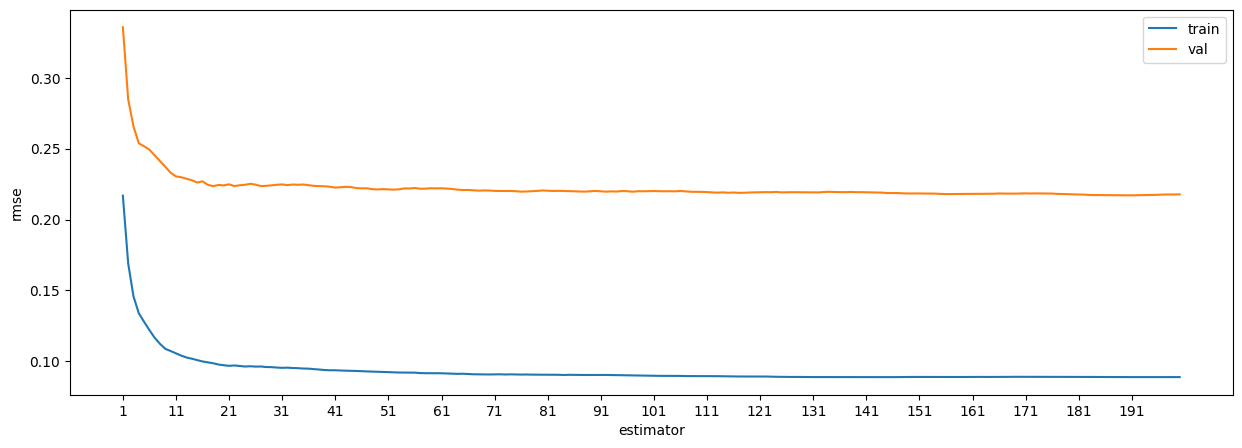

In [13]:
estimator(train_input,train_output,val_input,val_output,200)

# PREDICTION

In [14]:
from sklearn.metrics import accuracy_score

0.2656595046258037


C:\Users\Rajesh Gupta\AppData\Local\Temp\ipykernel_16716\2273649184.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


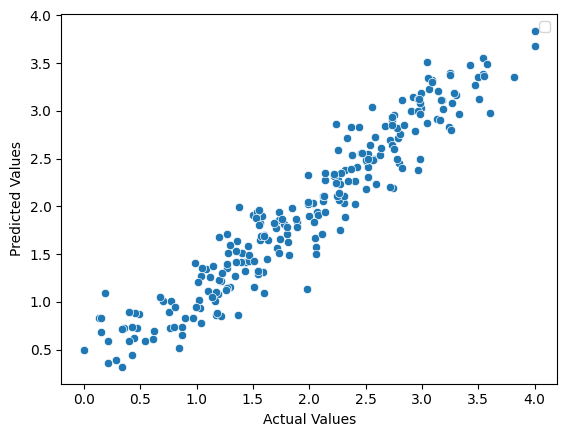

In [15]:
rm=RandomForestRegressor(n_jobs=-1,n_estimators=191,random_state=42)
model=rm.fit(train_input,train_output)
prediction=model.predict(test_input)
rmse=root_mean_squared_error(test_output,prediction)
print(rmse)
sns.scatterplot(x=test_output, y=prediction)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

## THE GRAPH BETWEEN ACTUAL OUTPUT AND PREDICTED OUTPUT SHOWS GOOD PERFORMANCE OF THE MODEL WITH ROOT MEAN SQUARED ERROR OF 0.2656595046258037.